# Task 1: Time Series Analysis
  Description: Analyze and model time-series data to forecast future values (e.g., stock prices, sales).
# Objectives:
    Plot and decompose the time series into trend,seasonality, and residual components.
    Implement moving average and exponential smoothing techniques.
    Build an ARIMA or SARIMA model for forecasting.
    Evaluate the model using metrics such as RMSE and visualize the forecast.
    Tools: Python, pandas, statsmodels, matplotlib.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import warnings
import os
warnings.filterwarnings('ignore')

In [12]:
tickers = ['AAPL', 'AMZN', 'GOOG', 'META','MSFT', 'NVDA', 'TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = datetime.now().strftime('%Y-%m-%d')

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

# Prepare a list to hold all data
all_data = []

# Reshape for each ticker
for ticker in tickers:
    df = data[ticker].copy()
    df['Date'] = df.index
    df['tickers'] = ticker
    # Reorder columns to match your template
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'tickers']]
    all_data.append(df)

# Concatenate all tickers' data
final_df = pd.concat(all_data).reset_index(drop=True)

# Sort by ticker and Date for clarity
final_df.sort_values(['tickers', 'Date'], inplace=True)

[*********************100%***********************]  9 of 9 completed


In [14]:
statistics_results = final_df.describe().T
display(pd.DataFrame(statistics_results))

,count,mean,min,25%,50%,75%,max,std
Price,,,,,,,,
Date,23193,2020-08-12 05:52:02.235157248,2015-07-01 00:00:00,2018-01-22 00:00:00,2020-08-12 00:00:00,2023-03-06 00:00:00,2025-09-29 00:00:00,NaN
Open,23193.0,154.989207,0.48125,52.709999,112.110001,215.479996,791.150024,139.175916
High,23193.0,156.595807,0.48825,53.412498,113.800003,217.649994,796.25,140.448688
Low,23193.0,153.331162,0.47725,52.110001,110.550003,213.0,780.820007,137.798533
Close,23193.0,155.024402,0.48275,52.730667,112.239998,215.830002,790.0,139.167399
Adj Close,23193.0,150.199585,0.467299,50.575764,110.629997,208.179993,789.467163,137.062522
Volume,23193.0,102815185.331781,0.0,21503200.0,51176000.0,102921000.0,3692928000.0,161286617.180841


In [15]:
final_df

Price,Date,Open,High,Low,Close,Adj Close,Volume,tickers
0,2015-07-01,31.725000,31.735001,31.497499,31.650000,28.322065,120955200,AAPL
1,2015-07-02,31.607500,31.672501,31.442499,31.610001,28.286266,108844000,AAPL
2,2015-07-06,31.235001,31.557501,31.212500,31.500000,28.187828,112241600,AAPL
3,2015-07-07,31.472500,31.537500,30.942499,31.422501,28.118475,187787200,AAPL
4,2015-07-08,31.120001,31.160000,30.635000,30.642500,27.420494,243046400,AAPL
...,...,...,...,...,...,...,...,...
18034,2025-09-23,439.880005,440.970001,423.720001,425.850006,425.850006,83422700,TSLA
18035,2025-09-24,429.829987,444.209991,429.029999,442.790009,442.790009,93133600,TSLA
18036,2025-09-25,435.239990,435.350006,419.079987,423.390015,423.390015,96746400,TSLA
18037,2025-09-26,428.299988,440.470001,421.019989,440.399994,440.399994,101628200,TSLA


In [17]:
final_df.to_csv('Stock_data/historical_data_for_stock.csv', index=False)

In [33]:
df_stock = pd.read_csv('Stock_data/historical_data_for_stock.csv', parse_dates=['Date'])

In [34]:
df_stock

,Date,Open,High,Low,Close,Adj Close,Volume,tickers
0,2015-07-01,31.725000,31.735001,31.497499,31.650000,28.322065,120955200,AAPL
1,2015-07-02,31.607500,31.672501,31.442499,31.610001,28.286266,108844000,AAPL
2,2015-07-06,31.235001,31.557501,31.212500,31.500000,28.187828,112241600,AAPL
3,2015-07-07,31.472500,31.537500,30.942499,31.422501,28.118475,187787200,AAPL
4,2015-07-08,31.120001,31.160000,30.635000,30.642500,27.420494,243046400,AAPL
...,...,...,...,...,...,...,...,...
23188,2025-09-23,439.880005,440.970001,423.720001,425.850006,425.850006,83422700,TSLA
23189,2025-09-24,429.829987,444.209991,429.029999,442.790009,442.790009,93133600,TSLA
23190,2025-09-25,435.239990,435.350006,419.079987,423.390015,423.390015,96746400,TSLA
23191,2025-09-26,428.299988,440.470001,421.019989,440.399994,440.399994,101628200,TSLA


In [35]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df_stock = df_stock.set_index('Date')
df_stock = df_stock.sort_index()

In [38]:
# Use 'Adj Close' for analysis
ts_data = df_stock.pivot(columns='tickers', values='Adj Close')
print("Dataset Info:")
print(ts_data.head())
print(f"Shape: {ts_data.shape}")
# Create output directories
os.makedirs('ts_plots', exist_ok=True)
os.makedirs('ts_reports', exist_ok=True)

Dataset Info:
tickers          AAPL       AMZN        BND       GOOG       META       MSFT  \
Date                                                                           
2015-07-01  28.322065  21.869499  60.616482  25.914658  86.377518  38.478931   
2015-07-02  28.286266  21.885500  60.766342  25.992128  86.755180  38.435623   
2015-07-06  28.187828  21.802000  60.976112  25.965311  87.013588  38.426975   
2015-07-07  28.118475  21.836000  61.036079  26.072578  86.685608  38.349079   
2015-07-08  27.420494  21.485001  61.208412  25.665861  85.125221  38.297138   

tickers         NVDA         SPY       TSLA  
Date                                         
2015-07-01  0.493677  174.433456  17.943333  
2015-07-02  0.494161  174.273758  18.667999  
2015-07-06  0.488111  173.777786  18.648001  
2015-07-07  0.478915  174.870651  17.858667  
2015-07-08  0.475527  171.936752  16.997334  
Shape: (2577, 9)


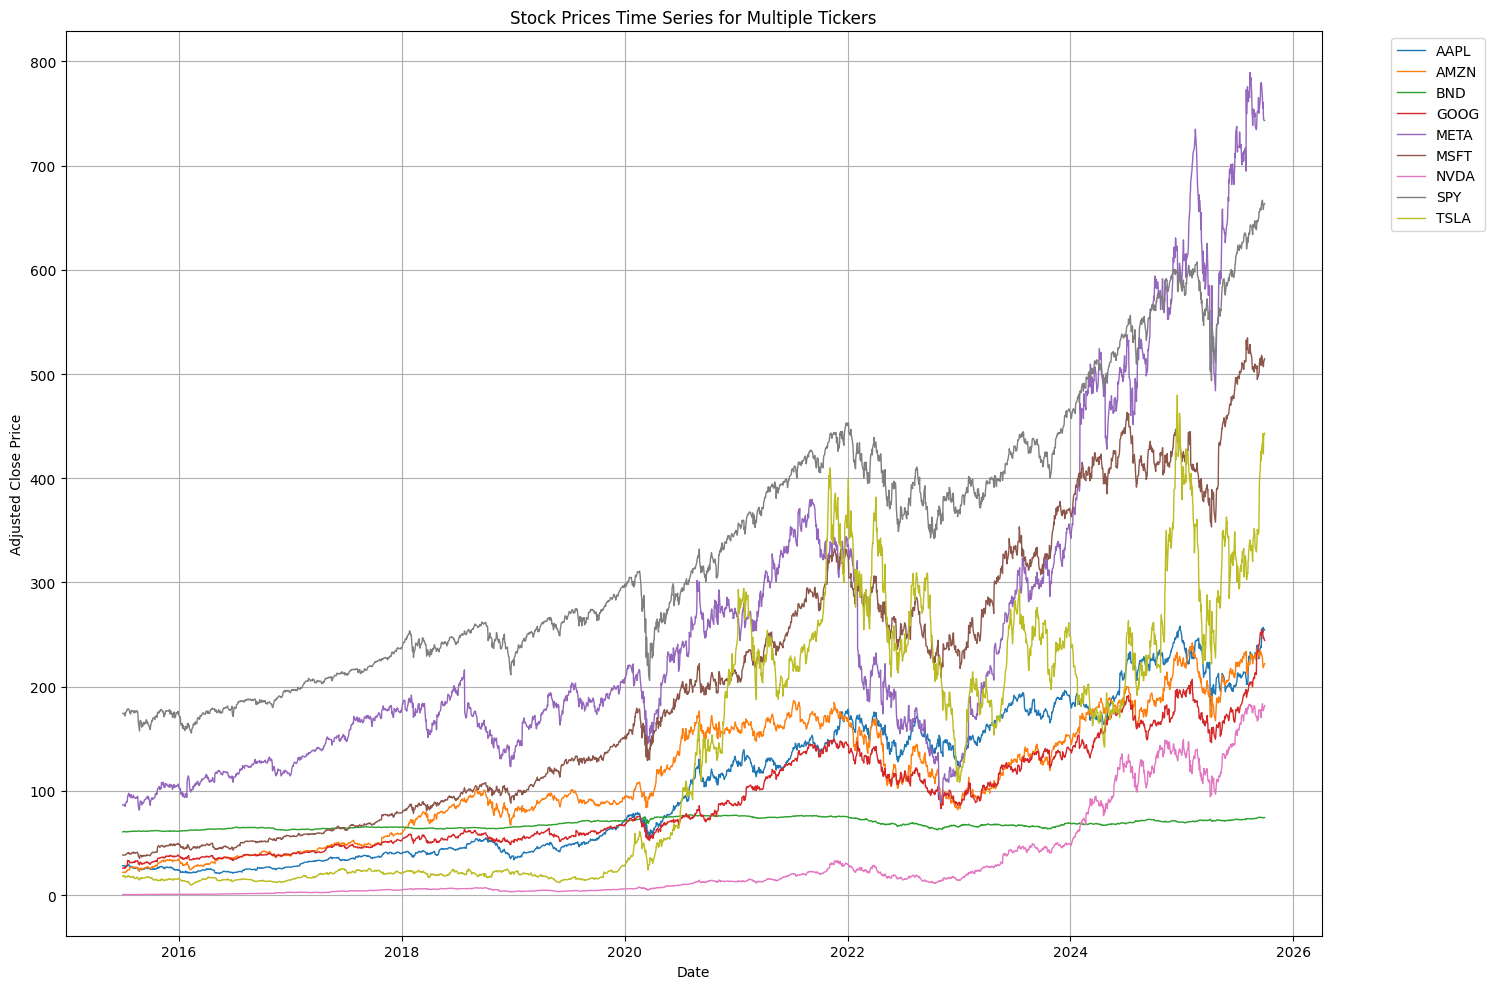

In [39]:
# Plot the Time Series for All Tickers
plt.figure(figsize=(15, 10))
for ticker in ts_data.columns:
    plt.plot(ts_data.index, ts_data[ticker], label=ticker, linewidth=1)
plt.title('Stock Prices Time Series for Multiple Tickers')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('ts_plots/multi_ticker_series.png', bbox_inches='tight')
plt.show()

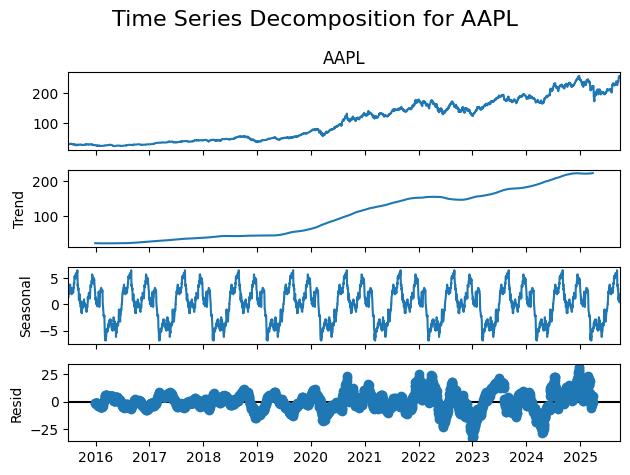

Decomposition plot saved for AAPL


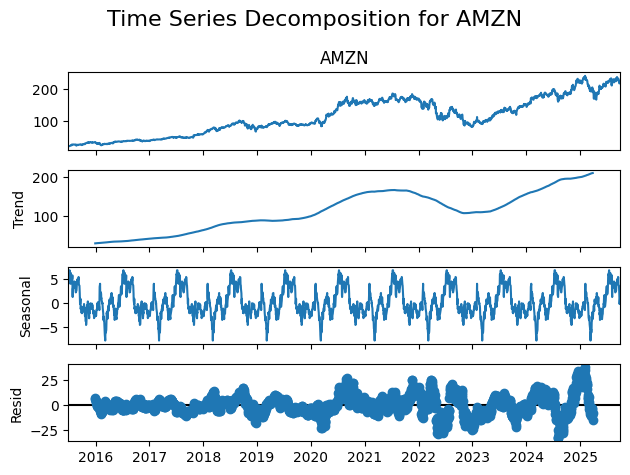

Decomposition plot saved for AMZN


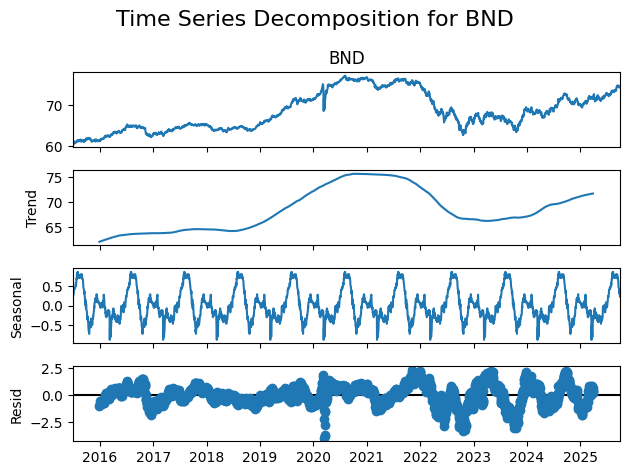

Decomposition plot saved for BND


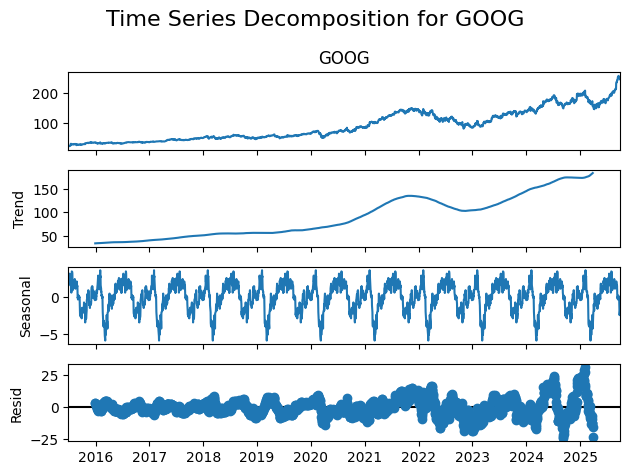

Decomposition plot saved for GOOG


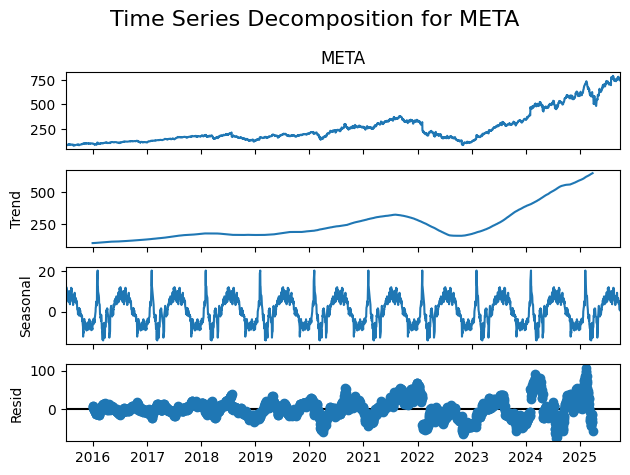

Decomposition plot saved for META


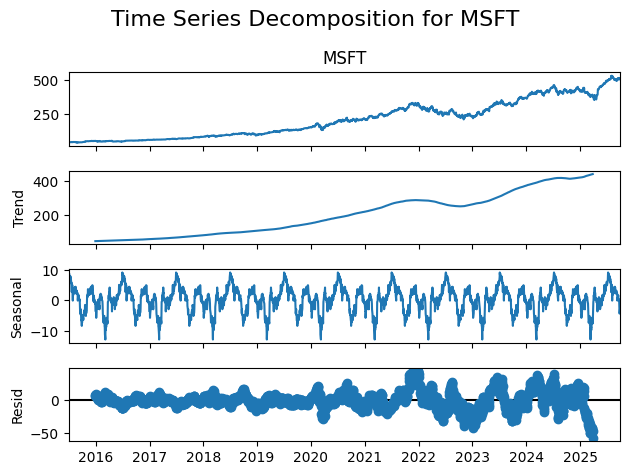

Decomposition plot saved for MSFT


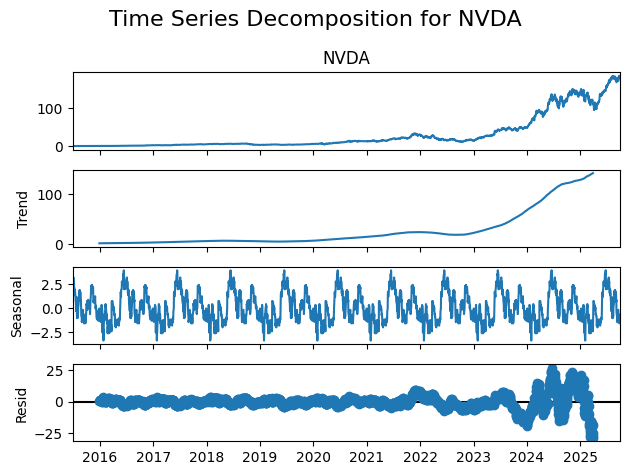

Decomposition plot saved for NVDA


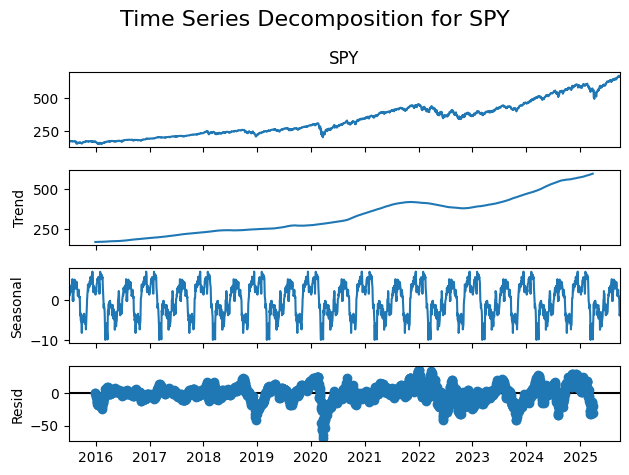

Decomposition plot saved for SPY


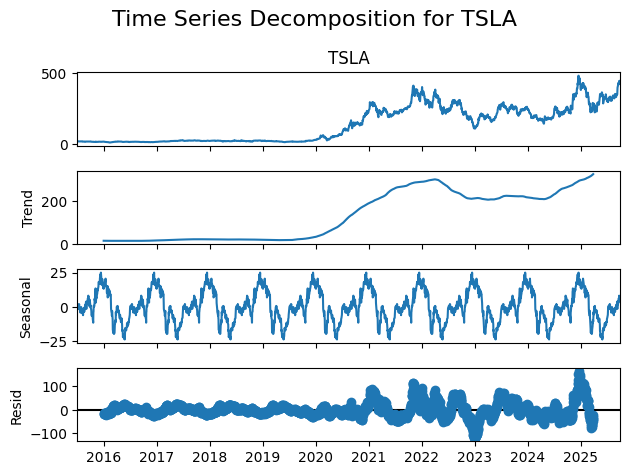

Decomposition plot saved for TSLA


In [41]:
# Decompose the Time Series (Example for AAPL)
# We'll do decomposition for each ticker and save plots
for ticker in ts_data.columns:
    try:
        # Ensure no NaNs
        series = ts_data[ticker].dropna()
        if len(series) < 24:  # Need enough data for decomposition
            print(f"Insufficient data for {ticker} decomposition")
            continue
        
        # Decompose (using additive model; adjust to multiplicative if needed)
        decomposition = seasonal_decompose(series, model='additive', period=252)  # Approx 252 trading days/year
        
        fig = decomposition.plot()
        fig.suptitle(f'Time Series Decomposition for {ticker}', fontsize=16)
        plt.tight_layout()
        plt.savefig(f'ts_plots/decomposition_{ticker}.png')
        plt.show()
        
        print(f"Decomposition plot saved for {ticker}")
    except Exception as e:
        print(f"Error in decomposition for {ticker}: {e}")

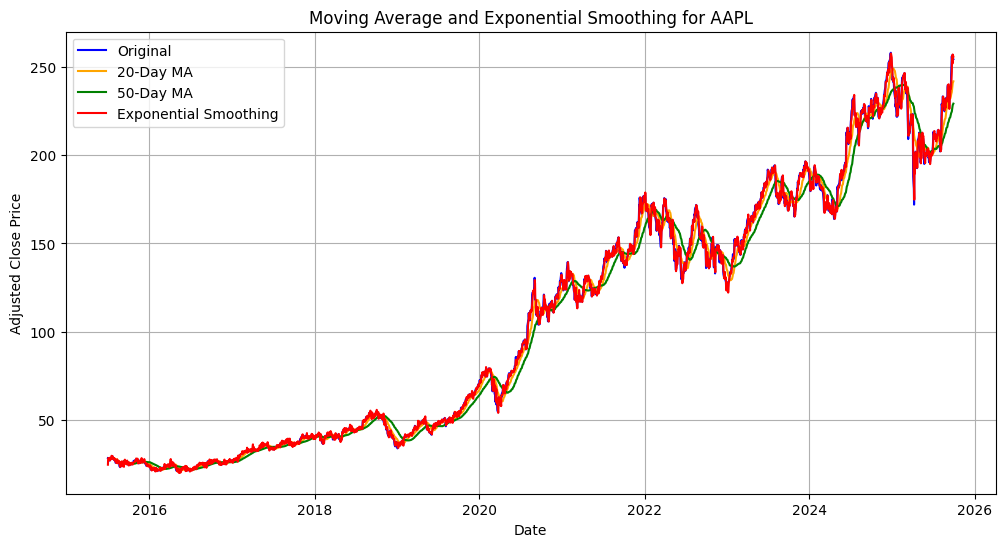

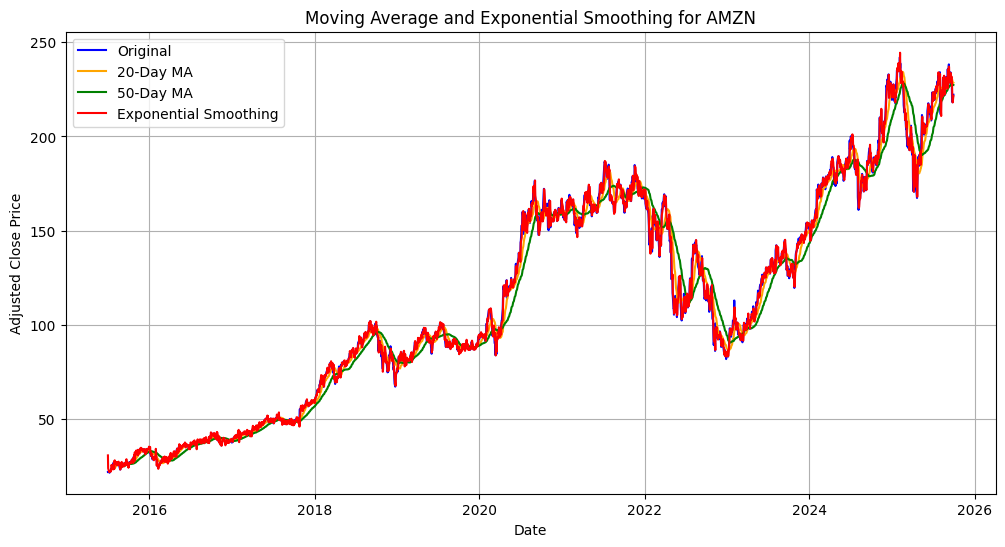

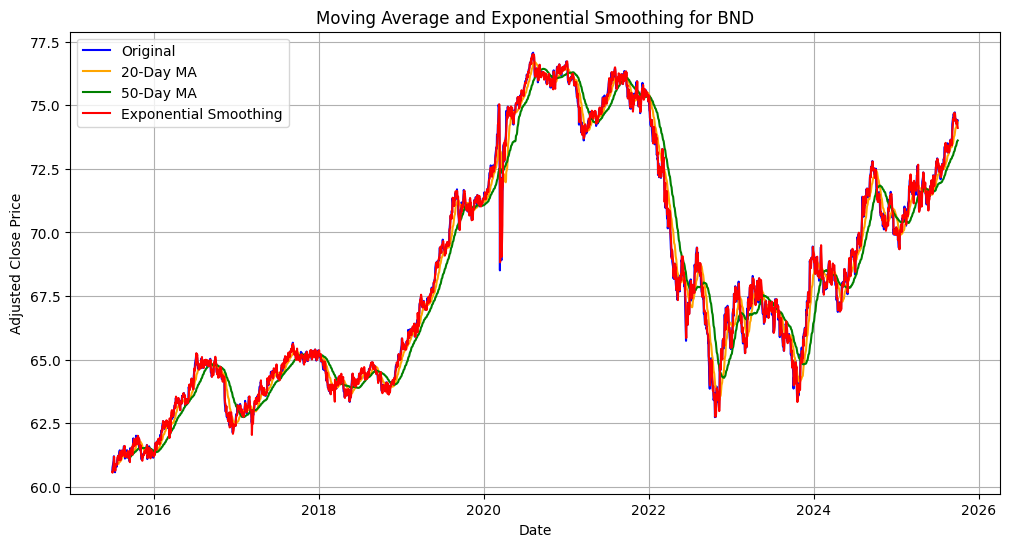

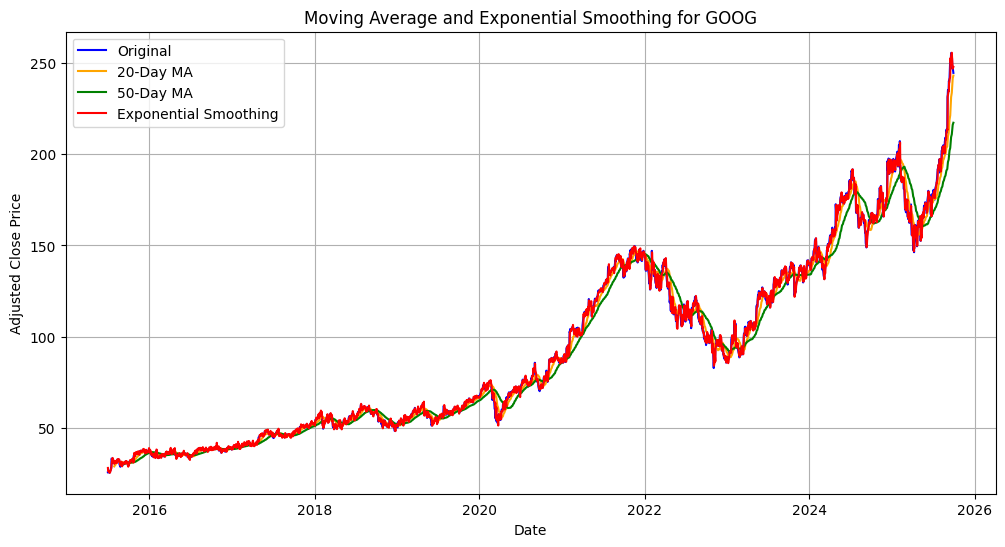

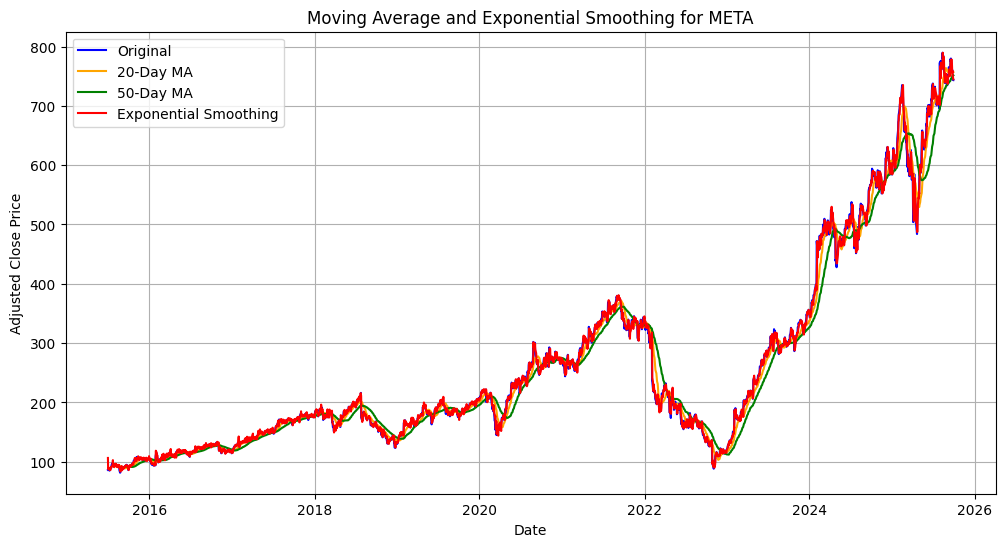

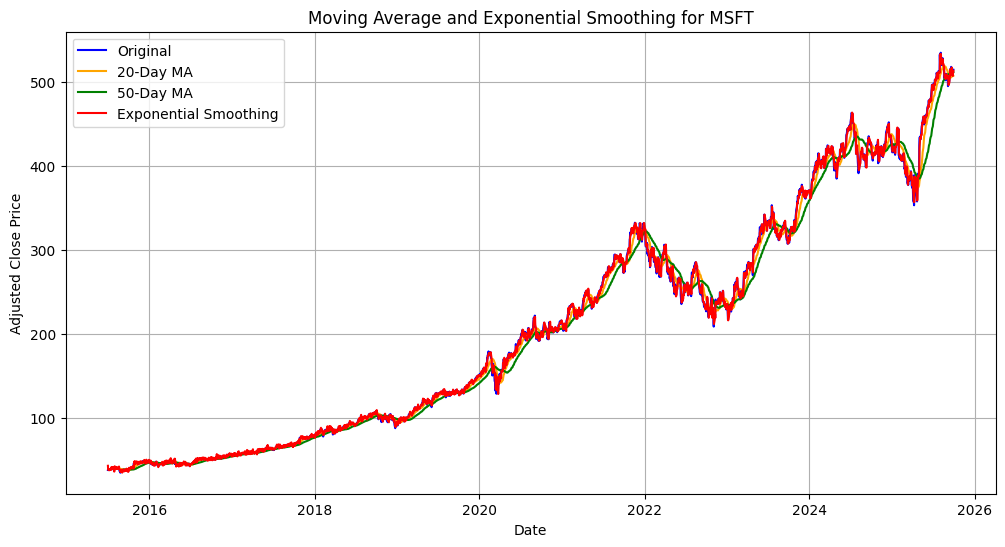

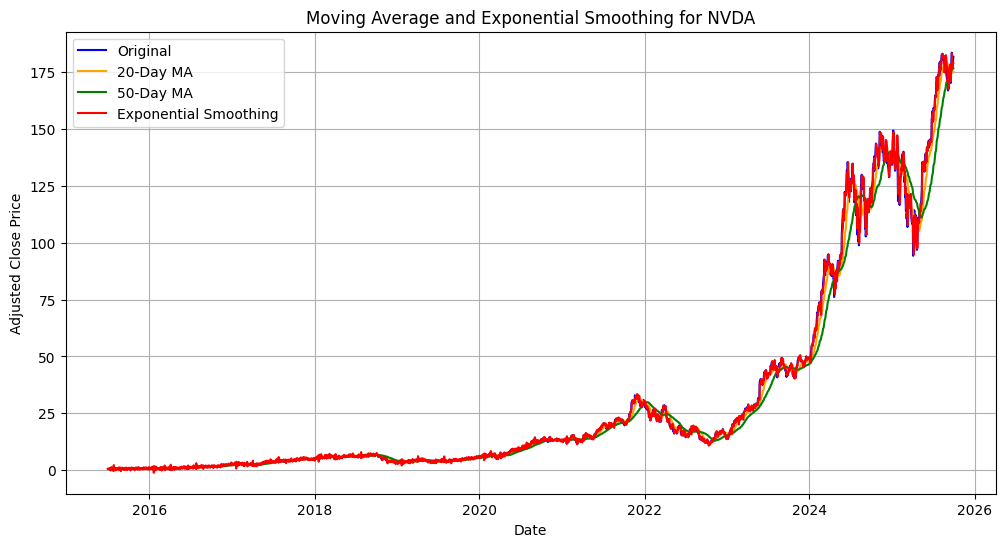

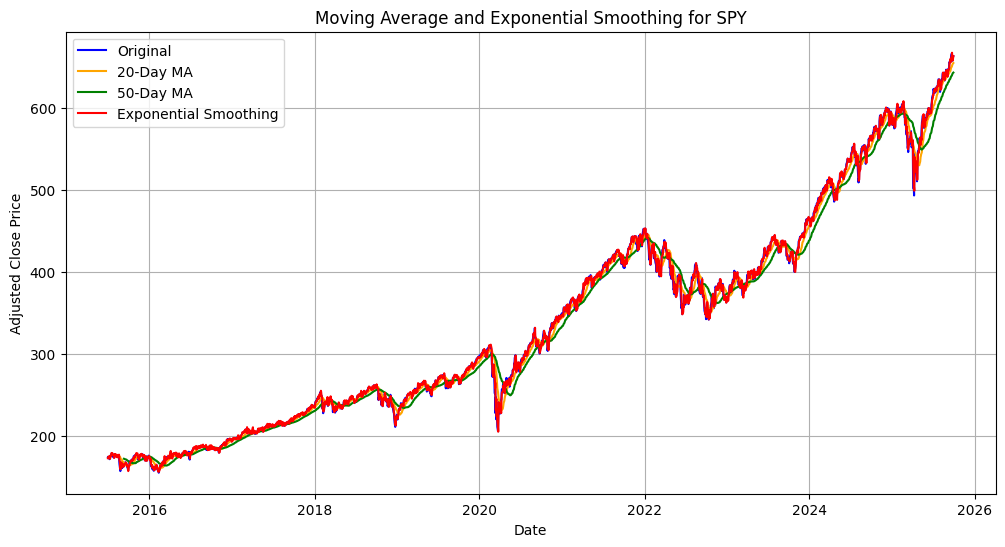

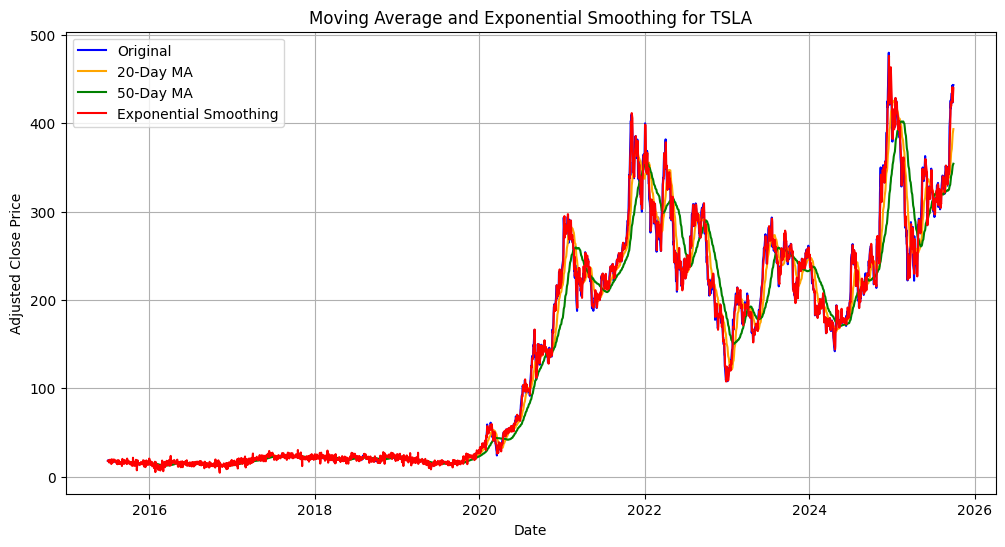

In [43]:
# Moving Average and Exponential Smoothing (for each ticker)
smoothing_results = {}
for ticker in ts_data.columns:
    series = ts_data[ticker].dropna()
    if len(series) < 12:
        continue
    
    # Moving Average
    ma_20 = series.rolling(window=20).mean()  # 20-day MA
    ma_50 = series.rolling(window=50).mean()  # 50-day MA
    
    # Exponential Smoothing (Holt-Winters)
    try:
        es_model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=252).fit()
        es_fitted = es_model.fittedvalues
    except:
        # Fallback to simple exponential smoothing if seasonal fails
        es_model = ExponentialSmoothing(series, trend='add').fit()
        es_fitted = es_model.fittedvalues
    
    smoothing_results[ticker] = {'ma_20': ma_20, 'ma_50': ma_50, 'es_fitted': es_fitted}
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(series.index, series, label='Original', color='blue')
    plt.plot(ma_20.index, ma_20, label='20-Day MA', color='orange')
    plt.plot(ma_50.index, ma_50, label='50-Day MA', color='green')
    plt.plot(es_fitted.index, es_fitted, label='Exponential Smoothing', color='red')
    plt.title(f'Moving Average and Exponential Smoothing for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'ts_plots/smoothing_{ticker}.png')
    plt.show()

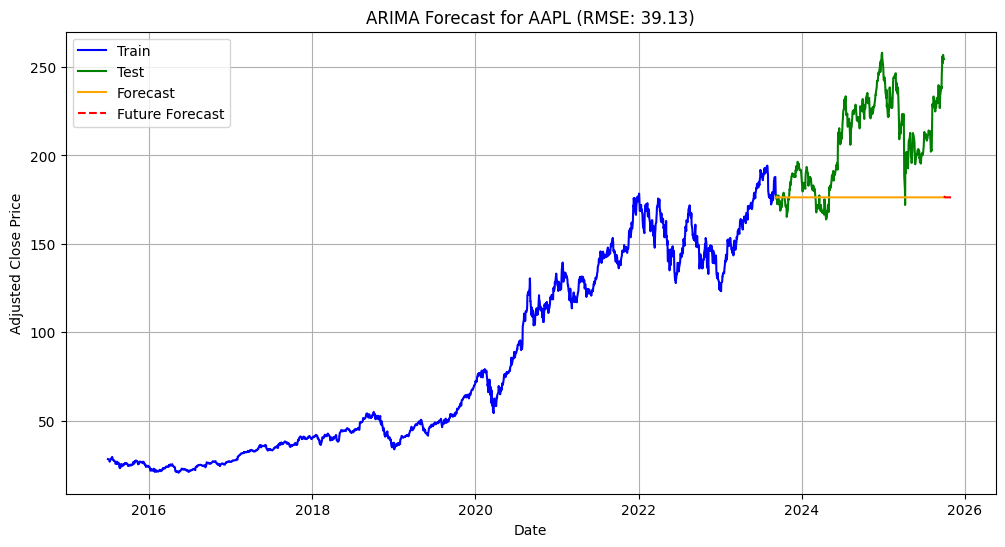

ARIMA RMSE for AAPL: 39.13


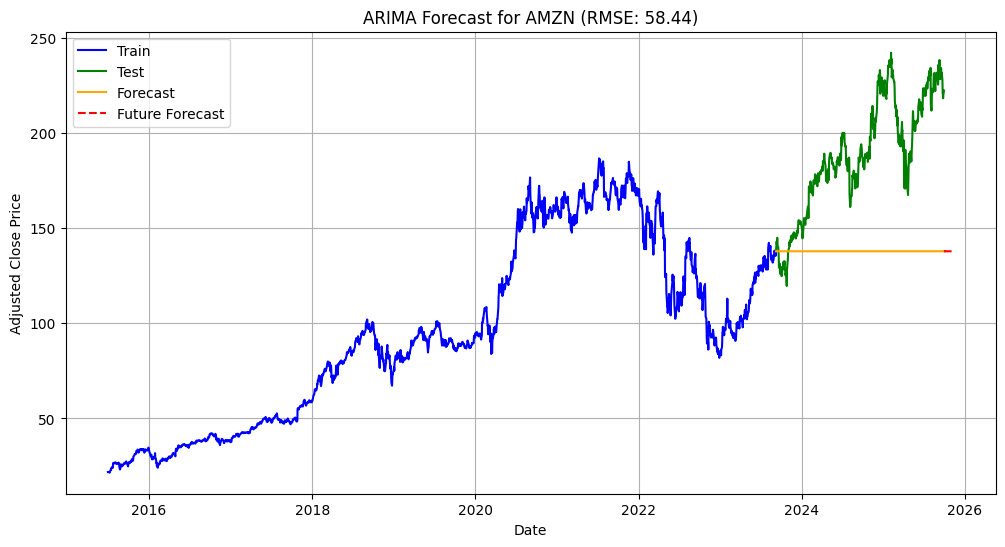

ARIMA RMSE for AMZN: 58.44


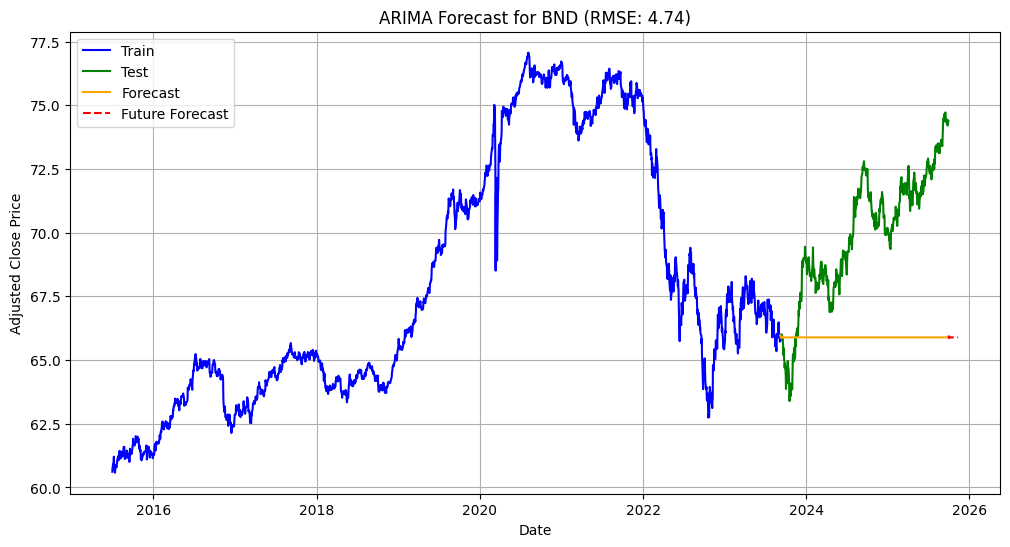

ARIMA RMSE for BND: 4.74


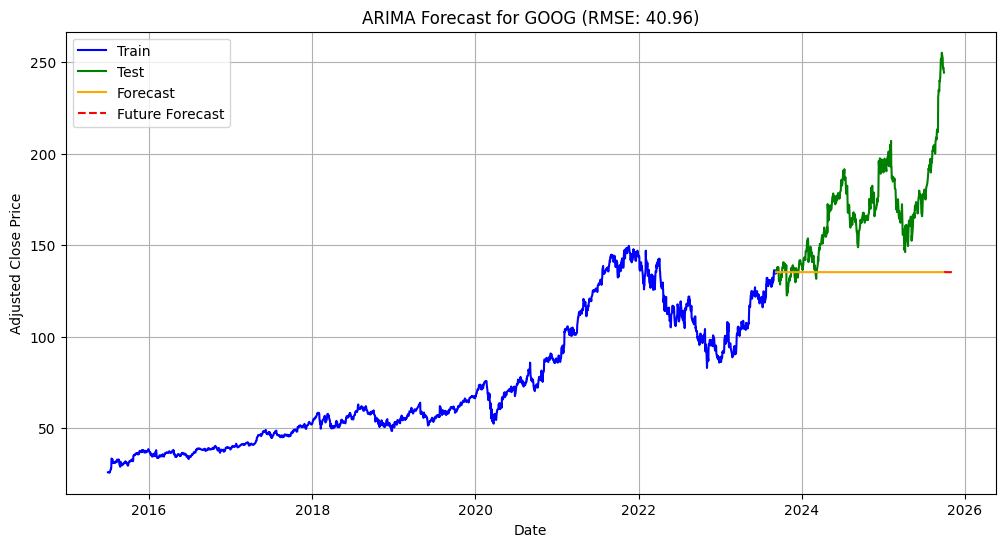

ARIMA RMSE for GOOG: 40.96


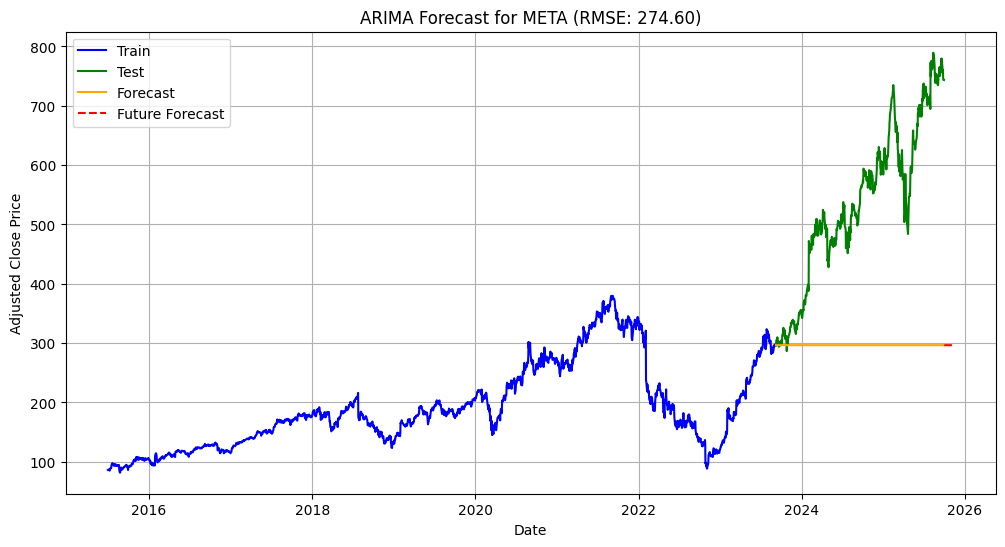

ARIMA RMSE for META: 274.60


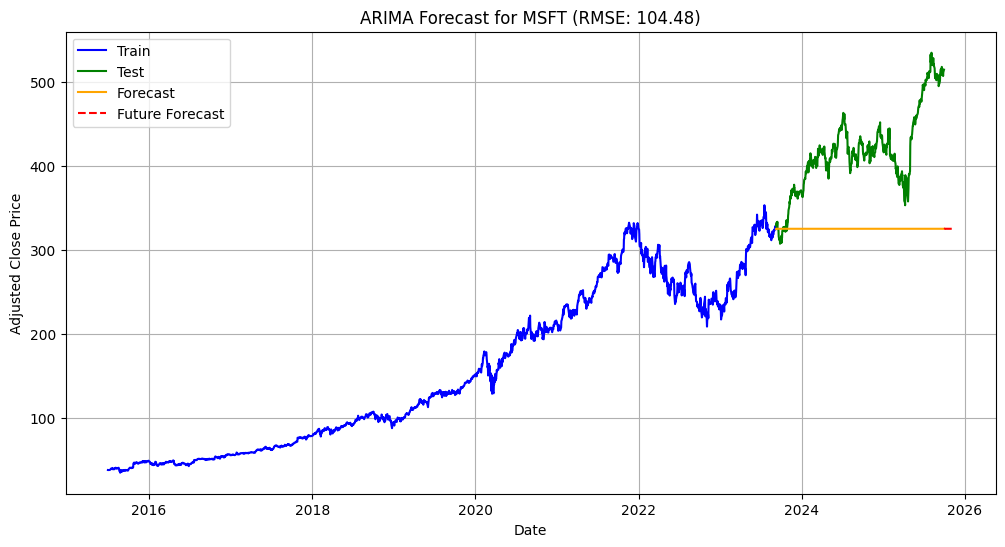

ARIMA RMSE for MSFT: 104.48


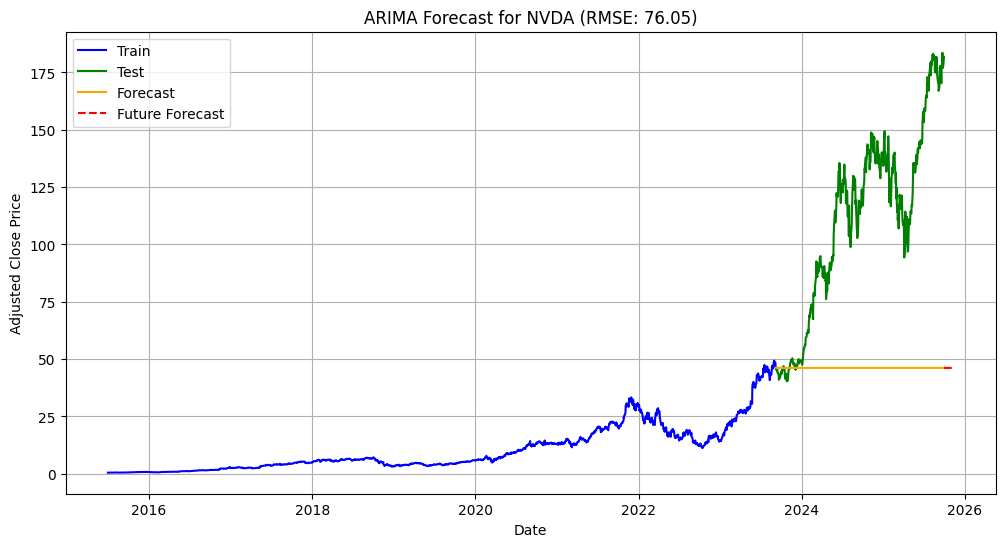

ARIMA RMSE for NVDA: 76.05


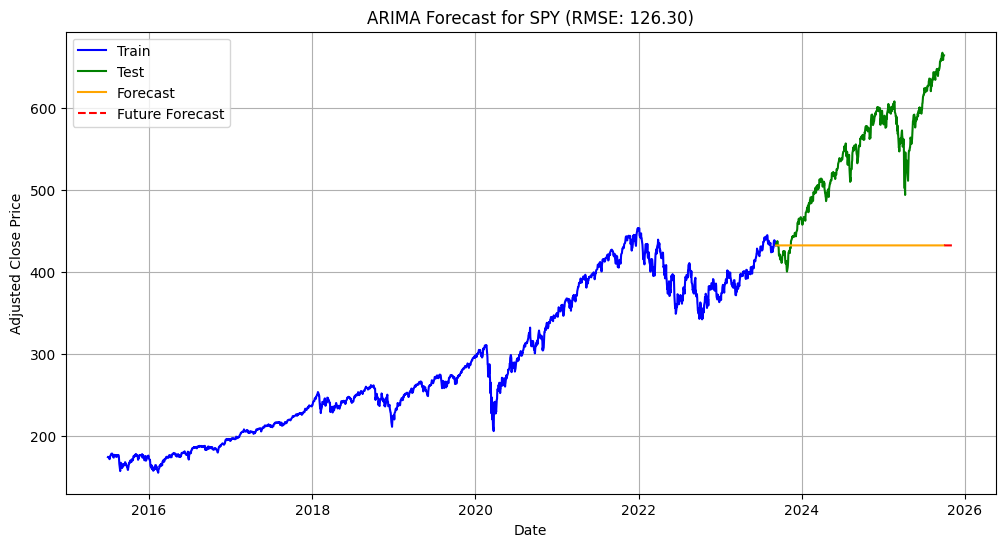

ARIMA RMSE for SPY: 126.30


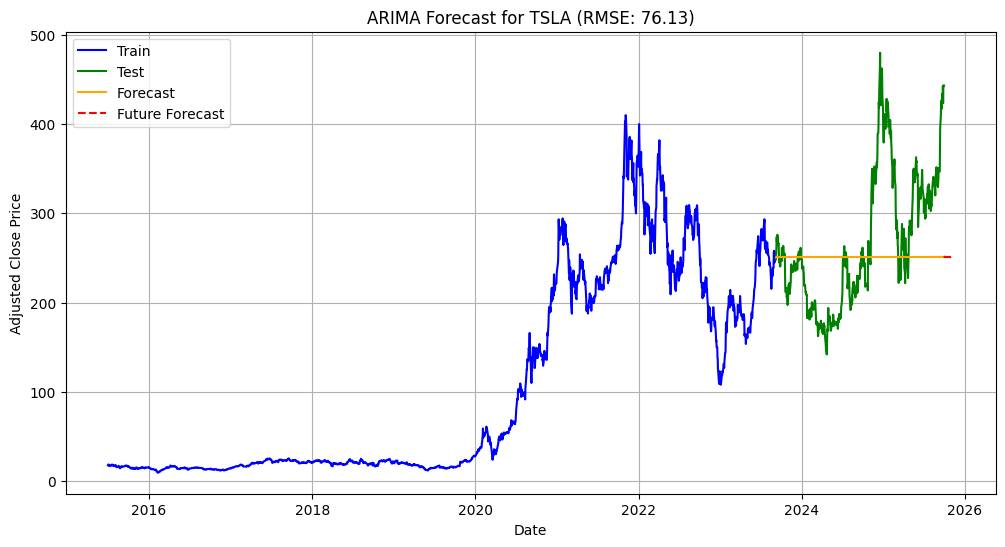

ARIMA RMSE for TSLA: 76.13


In [44]:

# Step 5: Build ARIMA/SARIMA Model and Forecast (for each ticker)
forecast_results = {}
rmse_results = {}
for ticker in ts_data.columns:
    series = ts_data[ticker].dropna()
    if len(series) < 50:  # Need sufficient data
        print(f"Insufficient data for {ticker} ARIMA")
        continue
    
    # Train-test split (80-20)
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    
    # Fit ARIMA (simple non-seasonal for daily data; adjust order as needed)
    try:
        # Basic ARIMA(5,1,0) - can be tuned
        model = ARIMA(train, order=(5,1,0)).fit()
        
        # Forecast on test set
        forecast = model.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        rmse_results[ticker] = rmse
        
        # Future forecast (next 30 days)
        future_forecast = model.forecast(steps=30)
        future_index = pd.date_range(start=series.index[-1], periods=31, freq='B')[1:]  # Business days
        
        forecast_results[ticker] = {'forecast': forecast, 'test': test, 'future_forecast': future_forecast, 'future_index': future_index}
        
        # Plot Forecast
        plt.figure(figsize=(12, 6))
        plt.plot(train.index, train, label='Train', color='blue')
        plt.plot(test.index, test, label='Test', color='green')
        plt.plot(test.index, forecast, label='Forecast', color='orange')
        plt.plot(future_index, future_forecast, label='Future Forecast', color='red', linestyle='--')
        plt.title(f'ARIMA Forecast for {ticker} (RMSE: {rmse:.2f})')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Close Price')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'ts_plots/arima_forecast_{ticker}.png')
        plt.show()
        
        print(f"ARIMA RMSE for {ticker}: {rmse:.2f}")
    except Exception as e:
        print(f"Error fitting ARIMA for {ticker}: {e}")

In [45]:
# Summary RMSE Table
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Ticker', 'RMSE'])
rmse_df.to_csv('ts_reports/rmse_summary.csv', index=False)
print("\nRMSE Summary:")
print(rmse_df)


RMSE Summary:
  Ticker        RMSE
0   AAPL   39.126130
1   AMZN   58.443180
2    BND    4.739933
3   GOOG   40.958183
4   META  274.597612
5   MSFT  104.483818
6   NVDA   76.046680
7    SPY  126.303136
8   TSLA   76.132382


In [ ]:
# Step 7: Generate Report
report_content = f"""
Dataset Shape: {ts_data.shape}
- Plots: ts_plots/decomposition_{ticker}.png for each ticker.
- Plots: ts_plots/smoothing_{ticker}.png for each ticker.
- RMSE Summary:
{rmse_df.to_string(index=False)}
- Plots: ts_plots/arima_forecast_{ticker}.png for each ticker.

"""
# Save report
with open('ts_reports/multi_ticker_ts_report.txt', 'w') as f:
    f.write(report_content)
print(report_content)


Dataset Shape: (2577, 9)
- Plots: ts_plots/decomposition_TSLA.png for each ticker.
- Plots: ts_plots/smoothing_TSLA.png for each ticker.
- RMSE Summary:
Ticker       RMSE
  AAPL  39.126130
  AMZN  58.443180
   BND   4.739933
  GOOG  40.958183
  META 274.597612
  MSFT 104.483818
  NVDA  76.046680
   SPY 126.303136
  TSLA  76.132382
- Plots: ts_plots/arima_forecast_TSLA.png for each ticker.


